In [1]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

from datetime import datetime

In [2]:
# File loading from relative path
file_mission_planner = '../Data/20201006 Mission Planner/(extracted) 20201007 Lake China - tlog new.csv'
file_korEXO_bluerov = '../Data/20201006-maine Exo/(extracted) Lake-China BlueRov Sonde - KorEXO Measurement File Export - 100620 214020.csv'
file_korEXO_catabot = '../Data/20201006-maine Exo/(extracted) Lake-China catabot Sonde - KorEXO Measurement File Export - 100620 214150.csv'

### experiment 
* Robotic boat was operated at 0.5m/s for auto mode
* Rosbag info xxx (xxx GB) -- sonde xxx msgs ==> sorted out starting and finish time for mission

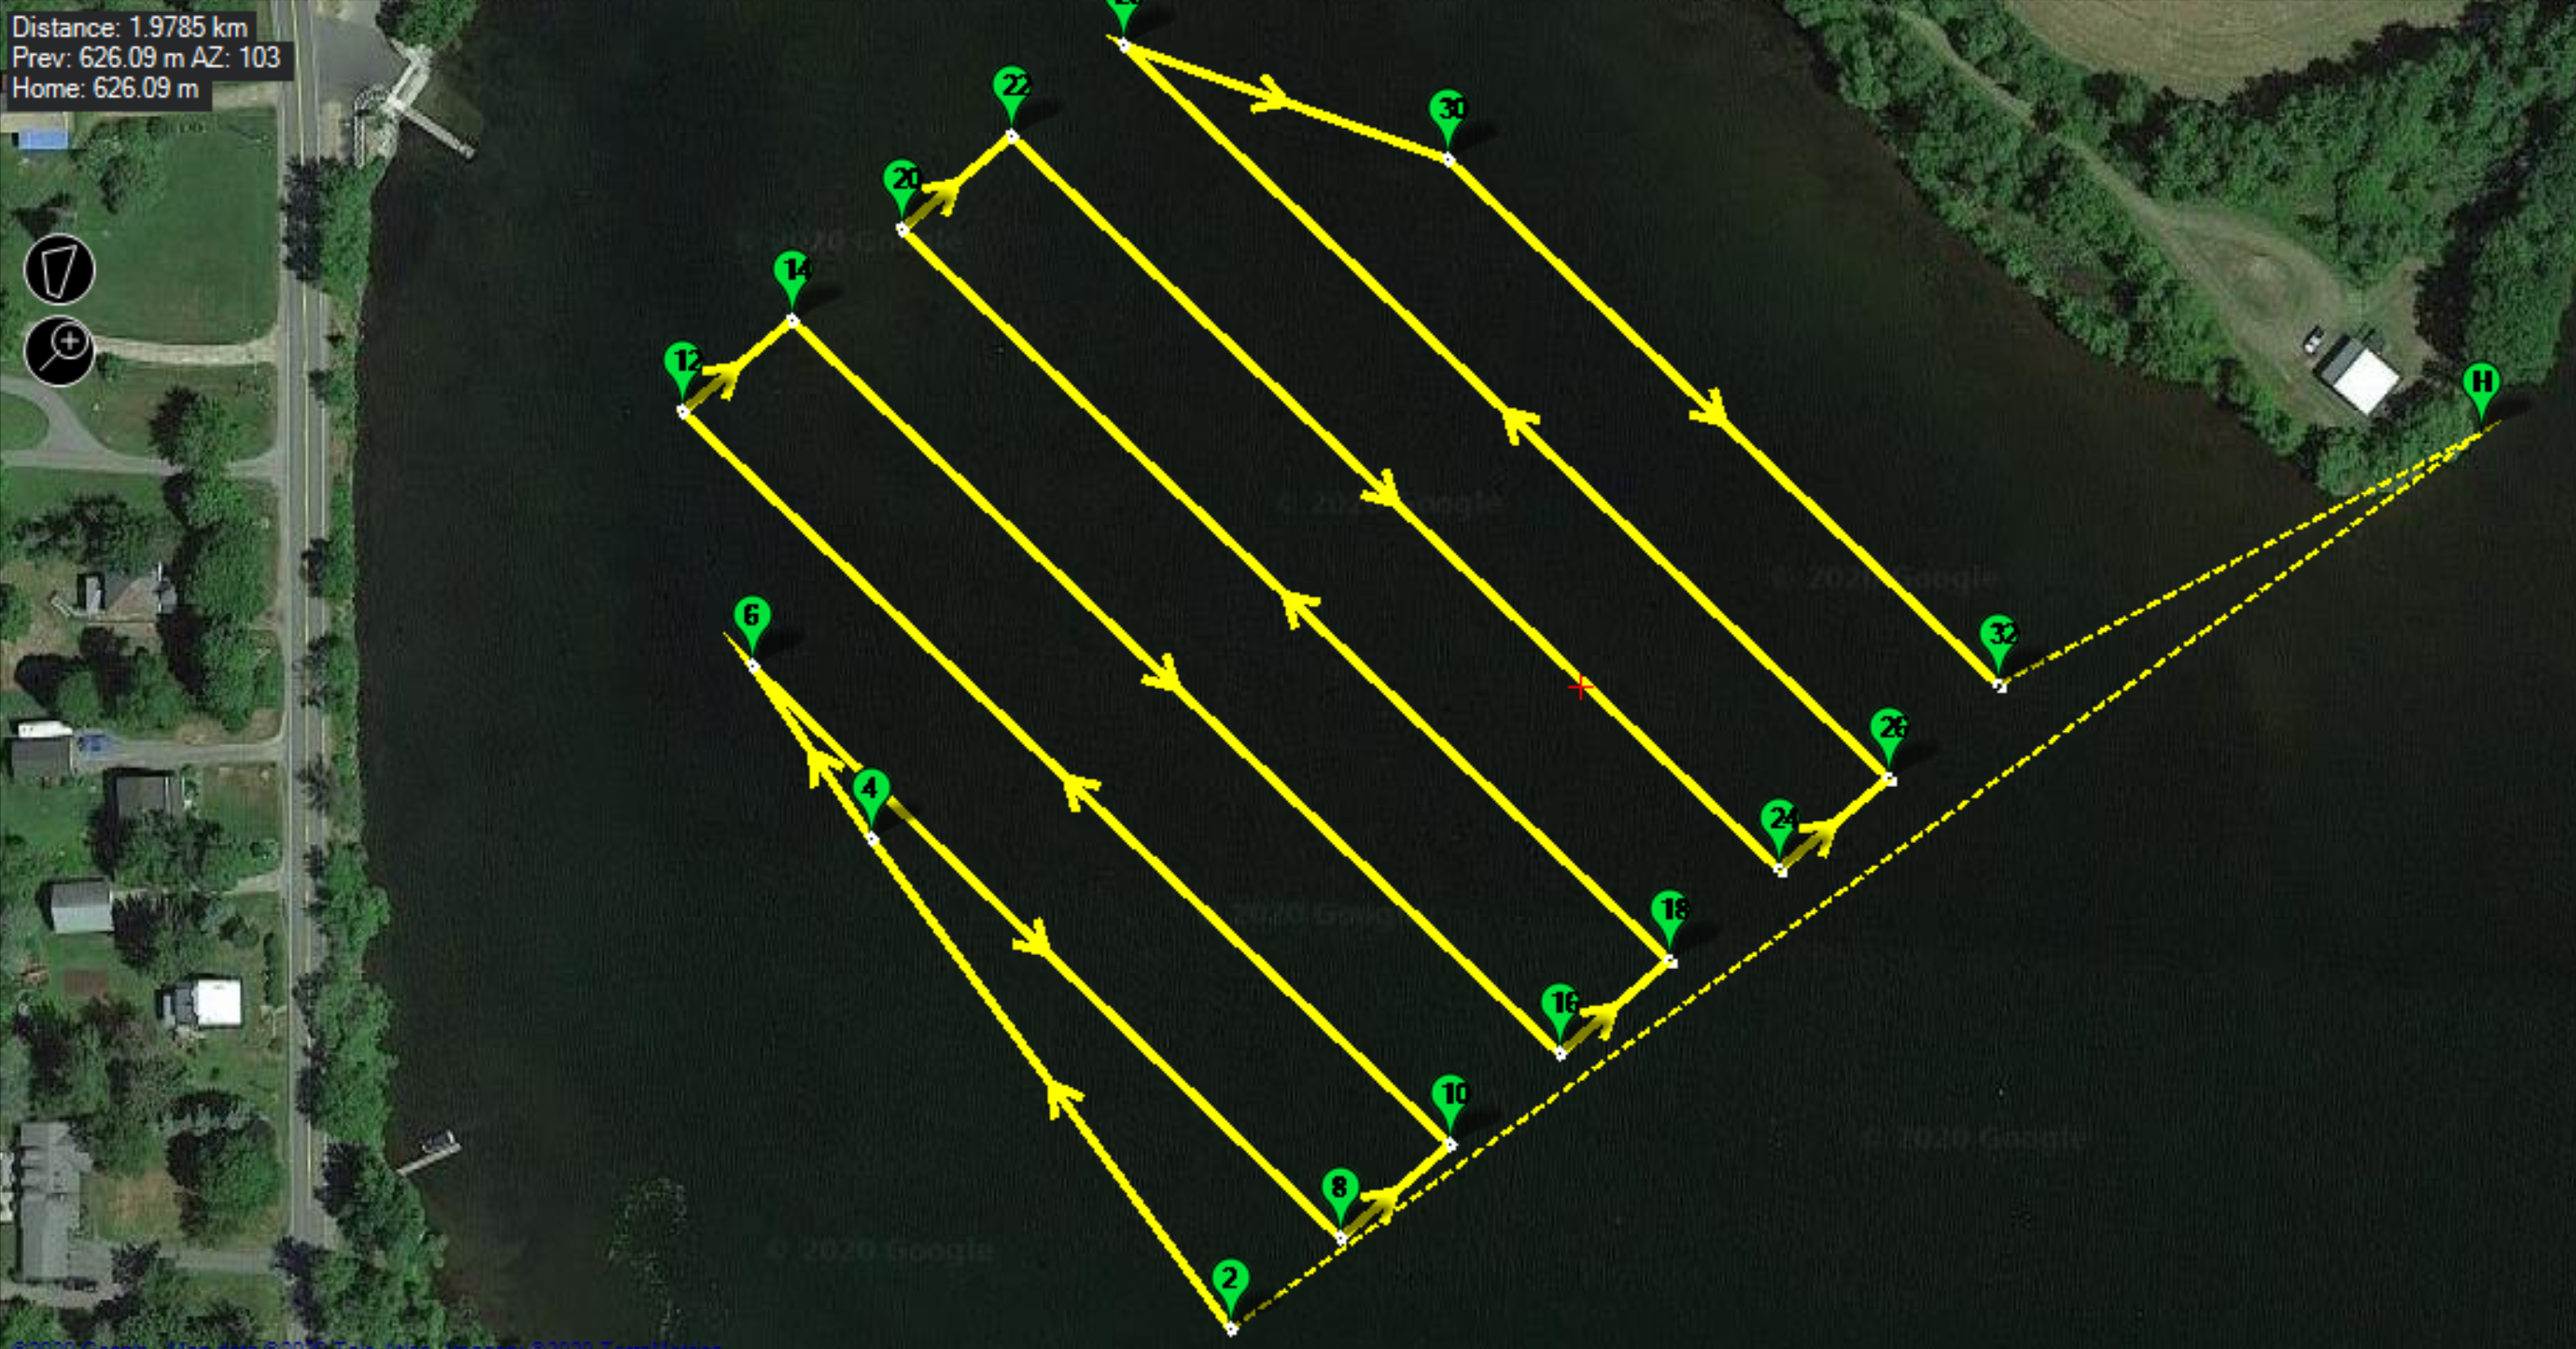

In [3]:
Image(filename = "../Images/china20201006.PNG", width = 600, height = 300)

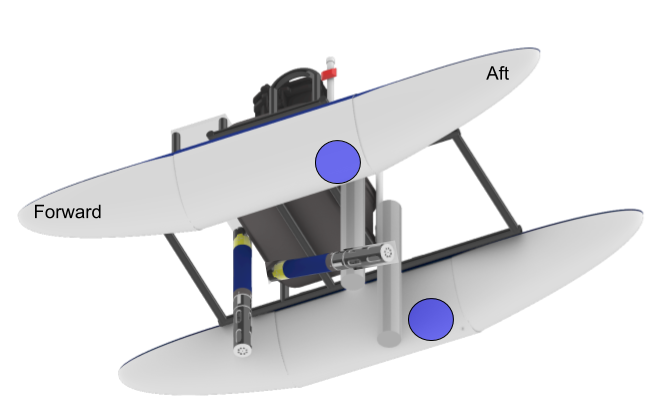

In [4]:
Image(filename = "../Images/Catabot-sonde.png", width = 450, height = 250)

In [5]:
# Figure initialization
fig = plt.figure()

# Time 
time_catabot_sonde_str = []
time_catabot_sonde_float =[]
standardized_time_catabot_sonde = []

time_bluerov_sonde_str = []
time_bluerov_sonde_float =[]
standardized_time_bluerov_sonde = []

time_tlog_str = []
time_tlog_float =[]
standardized_time_tlog = []


#robot egomotion
compass_heading = []
ground_speed = []
wp_number = []

# sonde data catabot
temp_catabot_sonde = []
PH_catabot_sonde = []
cond_catabot_sonde = [] # ms
chlorophyll_catabot_sonde = [] 
ODO_catabot_sonde = [] # mg/L
depth_catabot_sonde = []

# sonde data bluerov
temp_bluerov_sonde = []
PH_bluerov_sonde = []
cond_bluerov_sonde = [] # ms
chlorophyll_bluerov_sonde = [] 
ODO_bluerov_sonde = [] # mg/L
depth_bluerov_sonde = []
turbidity_bluerov_sonde = []

<Figure size 432x288 with 0 Axes>

In [6]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    if int(h) <= 11:
        h = int(h) + 12
    return int(h) * 3600 + int(m) * 60 + int(s)

In [7]:
### KorEXO sonde data -- bluerov

with open(file_korEXO_bluerov, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # time data
        time_bluerov_sonde_str.append(row[1])
        if get_sec(time_bluerov_sonde_str[-1]) - get_sec(time_bluerov_sonde_str[0]) >3500:
            time_bluerov_sonde_str.pop()
            continue
        
        # sonde data EXO
        temp_bluerov_sonde.append(float(row[20]))
        PH_bluerov_sonde.append(float(row[18]))
        cond_bluerov_sonde.append(float(row[5]))
        chlorophyll_bluerov_sonde.append(float(row[4]))
        ODO_bluerov_sonde.append(float(row[10]))
        depth_bluerov_sonde.append(float(row[6]))
        turbidity_bluerov_sonde.append(float(row[16]))
    
    for i in time_bluerov_sonde_str:
        time_bluerov_sonde_float.append(get_sec(i))
    
    minimum_time_bluerov = min(time_bluerov_sonde_float)
    for time_stamp_bluerov_sonde in time_bluerov_sonde_float:
        standardized_time_bluerov_sonde.append(time_stamp_bluerov_sonde - minimum_time_bluerov)

In [8]:
### KorEXO sonde data -- catabot

with open(file_korEXO_catabot, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # time data
        time_catabot_sonde_str.append(row[1])
        if get_sec(time_catabot_sonde_str[-1]) - get_sec(time_catabot_sonde_str[0]) > 3500:
            time_catabot_sonde_str.pop()
            continue
        
        # sonde data EXO
        temp_catabot_sonde.append(float(row[18]))
        PH_catabot_sonde.append(float(row[16]))
        cond_catabot_sonde.append(float(row[5]))
        chlorophyll_catabot_sonde.append(float(row[4]))
        ODO_catabot_sonde.append(float(row[10]))
        depth_catabot_sonde.append(float(row[6]))
    
    for i in time_catabot_sonde_str:
        time_catabot_sonde_float.append(get_sec(i))
    
    minimum_time_catabot_sonde = min(time_catabot_sonde_float)
    for time_stamp_catabot_sonde in time_catabot_sonde_float:
        standardized_time_catabot_sonde.append(time_stamp_catabot_sonde - minimum_time_catabot_sonde)

In [9]:
### telemetry log

with open(file_mission_planner, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # time data
        time_tlog_str.append(row[1]) #8,9,15
        if get_sec(time_tlog_str[-1]) - get_sec(time_tlog_str[0]) > 3000:
            time_tlog_str.pop()
            continue
            
        # robot data
        compass_heading.append(float(row[9]))
        ground_speed.append(float(row[8]))
        wp_number.append(float(row[15]))

    for i in time_tlog_str:
        time_tlog_float.append(get_sec(i))
    
    minimum_time_tlog = min(time_tlog_float)
    for time_tlog in time_tlog_float:
        standardized_time_tlog.append(time_tlog - minimum_time_tlog)

### Compass heading

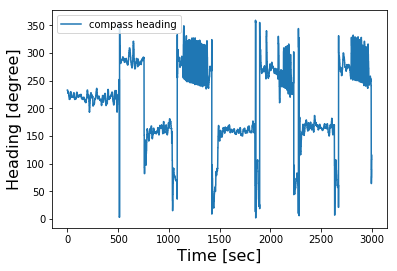

In [10]:
plt.plot(standardized_time_tlog, compass_heading, label='compass heading')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Heading [degree]', fontsize=16)
plt.legend()
#plt.show()

## speed

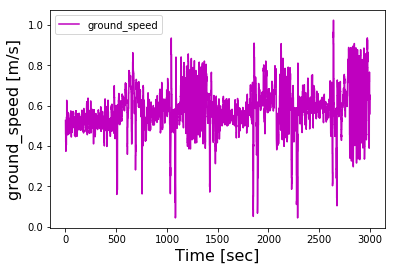

In [11]:
plt.plot(standardized_time_tlog, ground_speed, label='ground_speed', color='m')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('ground_speed [m/s]', fontsize=16)
plt.legend()
#plt.show()

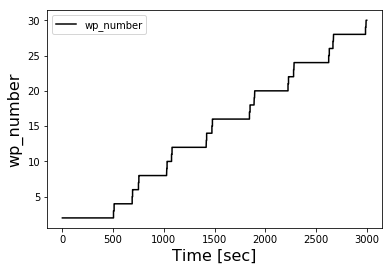

In [12]:
plt.plot(standardized_time_tlog, wp_number, label='wp_number', color='k')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('wp_number', fontsize=16)
plt.legend()
#plt.show()

### Temperature

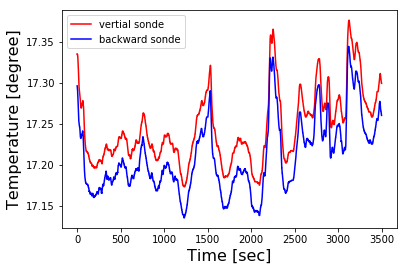

In [13]:
plt.plot(standardized_time_catabot_sonde, temp_catabot_sonde, label='vertial sonde', color='r')
plt.plot(standardized_time_bluerov_sonde, temp_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Temperature [degree]', fontsize=16)
plt.legend()
plt.show()

### Temperature scatter comparison and regresison

slope value 0.9786238510241235


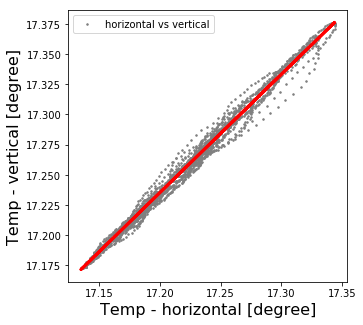

In [14]:
plt.figure(figsize=(5,5))
plt.plot(temp_bluerov_sonde, temp_catabot_sonde, '.', color='gray',  markersize=3, label='horizontal vs vertical')
plt.xlabel('Temp - horizontal [degree]', fontsize=16)
plt.ylabel('Temp - vertical [degree]', fontsize=16)

plt.legend()

numpy_x = np.array(temp_bluerov_sonde)
numpy_y = np.array(temp_catabot_sonde)
# regression
m, b = np.polyfit(numpy_x, numpy_y, 1)
print("slope value", m)
plt.plot(numpy_x, m*numpy_x + b, 'r', LineWidth=3)
plt.show()

### Temperature scatter 3D (x=hor, y=ver, z=time)

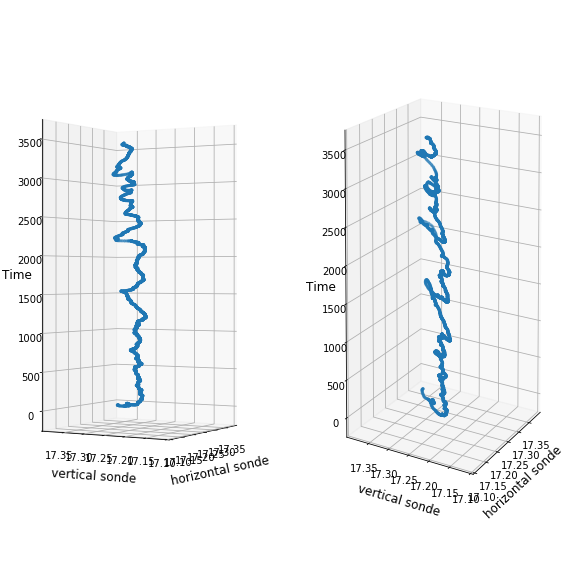

In [15]:
fig = plt.figure(figsize=(10,10))
#ax = plt.axes(projection ="3d")

ax1 = fig.add_subplot(1,2,1, projection='3d')
ax1.scatter(temp_bluerov_sonde, temp_catabot_sonde, standardized_time_bluerov_sonde, marker='.')

ax1.set_xlabel('horizontal sonde', fontsize=12)
ax1.set_ylabel('vertical sonde', fontsize=12)
ax1.set_zlabel('Time', fontsize=12)
plt.xlim([17.1,17.4])
plt.ylim([17.1,17.4])

ax1.view_init(0, 30)
ax1.invert_xaxis()
ax1.invert_yaxis()

ax2 = fig.add_subplot(1,2,2, projection='3d')
ax2.scatter(temp_bluerov_sonde, temp_catabot_sonde, standardized_time_bluerov_sonde, marker='.')

ax2.set_xlabel('horizontal sonde', fontsize=12)
ax2.set_ylabel('vertical sonde', fontsize=12)
ax2.set_zlabel('Time', fontsize=12)
plt.xlim([17.1,17.4])
plt.ylim([17.1,17.4])

ax2.view_init(10, 30)
ax2.invert_xaxis()
ax2.invert_yaxis()
plt.show()

### PH

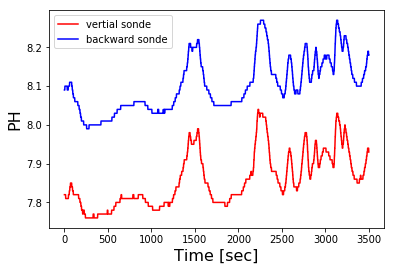

In [16]:
plt.plot(standardized_time_catabot_sonde, PH_catabot_sonde, label='vertial sonde', color='r')
plt.plot(standardized_time_bluerov_sonde, PH_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('PH', fontsize=16)
plt.legend()
#plt.show()

### PH scatter and regression

slope value 1.0052784024559194


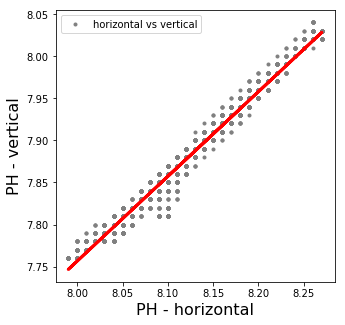

In [17]:
plt.figure(figsize=(5,5))
plt.plot(PH_bluerov_sonde, PH_catabot_sonde, '.', color='gray', label='horizontal vs vertical')
plt.xlabel('PH - horizontal', fontsize=16)
plt.ylabel('PH - vertical', fontsize=16)

plt.legend()

numpy_x = np.array(PH_bluerov_sonde)
numpy_y = np.array(PH_catabot_sonde)
# regression
m, b = np.polyfit(numpy_x, numpy_y, 1)
print("slope value", m)
plt.plot(numpy_x, m*numpy_x + b, 'r', LineWidth=3)
plt.show()

### Conductivity

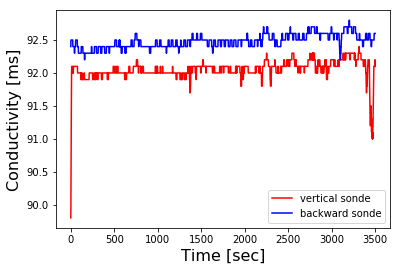

In [18]:
plt.plot(standardized_time_catabot_sonde, cond_catabot_sonde, label='vertical sonde', color='r')
plt.plot(standardized_time_bluerov_sonde, cond_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Conductivity [ms]', fontsize=16)
plt.legend()
#plt.show()

### Conductivity scatter and regression

slope value 0.6083126188909703


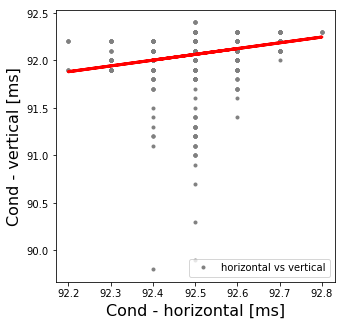

In [19]:
plt.figure(figsize=(5,5))
plt.plot(cond_bluerov_sonde,cond_catabot_sonde, '.', color='gray', label='horizontal vs vertical')
plt.xlabel('Cond - horizontal [ms]', fontsize=16)
plt.ylabel('Cond - vertical [ms]', fontsize=16)

plt.legend()

numpy_x = np.array(cond_bluerov_sonde)
numpy_y = np.array(cond_catabot_sonde)
# regression
m, b = np.polyfit(numpy_x, numpy_y, 1)
print("slope value", m)
plt.plot(numpy_x, m*numpy_x + b, 'r', LineWidth=3)
plt.show()

### Chlorophyll 

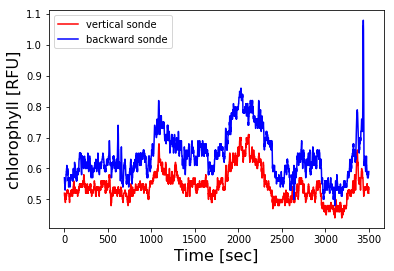

In [20]:
plt.plot(standardized_time_catabot_sonde, chlorophyll_catabot_sonde, label='vertical sonde', color='r')
plt.plot(standardized_time_bluerov_sonde, chlorophyll_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('chlorophyll [RFU]', fontsize=16)
plt.legend()
#plt.show()

### Chlorophyll scatter and regression

slope value 0.560373430378097


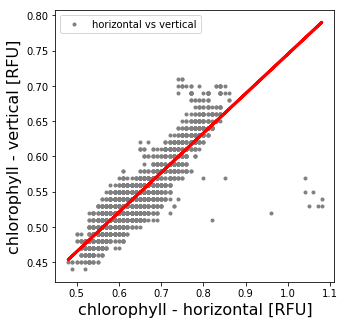

In [21]:
plt.figure(figsize=(5,5))
plt.plot(chlorophyll_bluerov_sonde, chlorophyll_catabot_sonde, '.', color='gray', label='horizontal vs vertical')
plt.xlabel('chlorophyll - horizontal [RFU]', fontsize=16)
plt.ylabel('chlorophyll - vertical [RFU]', fontsize=16)

plt.legend()

numpy_x = np.array(chlorophyll_bluerov_sonde)
numpy_y = np.array(chlorophyll_catabot_sonde)
# regression
m, b = np.polyfit(numpy_x, numpy_y, 1)
print("slope value", m)
plt.plot(numpy_x, m*numpy_x + b, 'r', LineWidth=3)
plt.show()

### ODO

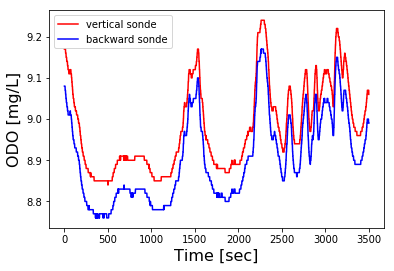

In [22]:
plt.plot(standardized_time_catabot_sonde, ODO_catabot_sonde, label='vertical sonde', color='r')
plt.plot(standardized_time_bluerov_sonde, ODO_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('ODO [mg/L]', fontsize=16)
plt.legend()
#plt.show()

slope value 0.9907695663097452


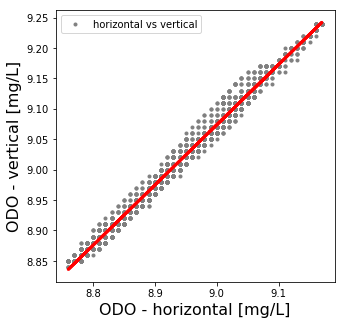

In [23]:
plt.figure(figsize=(5,5))
plt.plot(ODO_bluerov_sonde, ODO_catabot_sonde, '.', color='gray', label='horizontal vs vertical')
plt.xlabel('ODO - horizontal [mg/L]', fontsize=16)
plt.ylabel('ODO - vertical [mg/L]', fontsize=16)

plt.legend()

numpy_x = np.array(ODO_bluerov_sonde)
numpy_y = np.array(ODO_catabot_sonde)
# regression
m, b = np.polyfit(numpy_x, numpy_y, 1)
print("slope value", m)
plt.plot(numpy_x, m*numpy_x + b, 'r', LineWidth=3)
plt.show()

### Depth

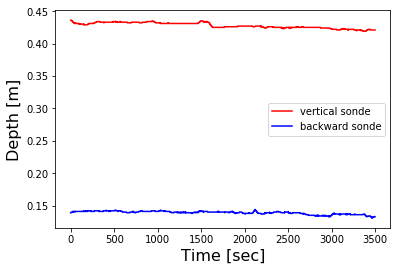

In [24]:
plt.plot(standardized_time_catabot_sonde, depth_catabot_sonde, label='vertical sonde', color='r')
plt.plot(standardized_time_bluerov_sonde, depth_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Depth [m]', fontsize=16)
plt.legend()
#plt.show()

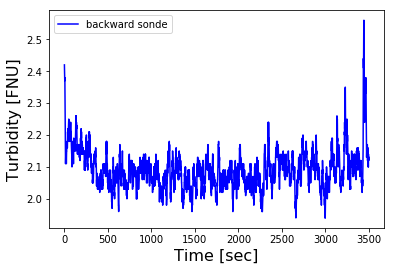

In [25]:
plt.plot(standardized_time_catabot_sonde, turbidity_bluerov_sonde, label='backward sonde', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Turbidity [FNU]', fontsize=16)
plt.legend()